# Introduction

In this notebook, we are going to download a **pretained** neural network, load it, and perform some image classifications.

The transformer network takes an image and creates squares, or patches, from it, which are used to train the model. Similiar to how a transformer network works for translating text, the patches are used in a sort of chain that, when joined togheter, form a complete image, similar to hot sentences are formed from words. We are goin to use Pytorch for this.

In [1]:
# Download all pre-trained transformers networks
!pip install transformers

In [2]:
# Load base model
from transformers import ViTForImageClassification
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [3]:
# Let's see the architecture
print(model)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [4]:
# Number of parameters
total_params = sum(p.numel() for p in model.parameters())
train_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
no_train_params = total_params - train_params

print(f'Total parameters: {total_params}')
print(f'Trainable parameters: {train_params}')
print(f'Non-trainable parameters: {no_train_params}')

Total parameters: 86567656
Trainable parameters: 86567656
Non-trainable parameters: 0


In [5]:
# Size of the input images
print(model.config.image_size)

224


In [6]:
# Size of patches
print(model.config.patch_size)

16


In [7]:
# Number of categories
print(model.config.num_labels)

1000


In [8]:
# What are the categories?
print(model.config.id2label)

{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mu

# Upload a custom image


Before using our own images, it is necessary to preprocess them.

1. Resize the image to a size of 224x224x3.

2. Scale the pixels values to change the range from [0,255] to [-1,1].

In [9]:
from transformers import ViTImageProcessor

preprocess = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

(720, 719)
('R', 'G', 'B')
((0, 255), (0, 255), (0, 255))


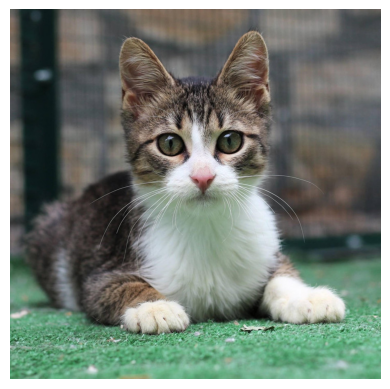

In [22]:
# Upload and show characteristics of an image
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('/content/cat.jpg')

print(image.size)
print(image.getbands())
print(image.getextrema())

plt.imshow(image)
plt.axis('off');

In [23]:
# Preprocess the original image
x = preprocess(image, return_tensors = 'pt') # batch, channels, high, wide

print(x.pixel_values.shape)
print(x.pixel_values.min(), x.pixel_values.max())

torch.Size([1, 3, 224, 224])
tensor(-0.9843) tensor(1.)


# Image Classification

In [24]:
# Prediction in the logits space
import torch

with torch.no_grad(): # We don't want to train
  logits = model(**x).logits

print(logits.shape)
print(logits)

torch.Size([1, 1000])
tensor([[-2.5567e-01,  3.4026e-01, -7.2462e-01,  7.0983e-02, -1.8495e-01,
         -4.4460e-01, -1.0494e+00,  4.5459e-01,  1.7837e-02,  8.1238e-01,
          9.2968e-02, -1.2146e+00, -1.4838e-01, -1.2515e+00, -1.1332e+00,
          8.7715e-01, -6.0111e-01, -6.7007e-01,  1.0975e+00, -1.4861e+00,
         -4.6479e-01,  4.6484e-01,  1.6011e-01,  3.8005e-01,  5.6168e-02,
         -2.7429e-01,  5.9817e-01,  6.7411e-02, -6.5128e-02, -2.6373e-02,
         -7.8528e-01, -7.5254e-01, -6.2636e-01, -1.9951e+00, -9.2317e-01,
         -7.5128e-01,  6.6226e-01,  4.5411e-01,  1.1805e+00, -4.8989e-01,
         -1.3915e-01,  5.4139e-01,  2.3173e-01,  5.2243e-01,  4.1801e-01,
         -8.6478e-01, -4.4198e-01, -4.7640e-01, -7.1047e-01, -7.6842e-01,
         -1.0772e+00, -1.2164e+00,  1.1321e-01, -6.8842e-01, -7.2322e-01,
         -6.6988e-01,  5.2543e-01,  9.9674e-02, -1.2419e+00,  6.3417e-02,
          1.7805e+00,  1.0237e+00,  4.7365e-01,  8.3621e-01, -1.9665e-01,
         -6.6309

In [25]:
# We need to find the max value in all the possible outputs
cat_num = logits.argmax(-1).item()
print(cat_num)

285


In [26]:
# Convert number label to string
cat_str = model.config.id2label[cat_num]
print(cat_str)

Egyptian cat


# Summary

All the previous code is summarized in the following cell.

In [27]:
def predict(model, preprocess, image_path):
  image = Image.open(image_path)
  x = preprocess(image, return_tensors='pt')

  with torch.no_grad():
    logits = model(**x).logits

  cat_num = logits.argmax(-1).item()
  cat_str = model.config.id2label[cat_num]

  plt.imshow(image)
  plt.axis('off')
  plt.title(f'Predicted category: {cat_str}')

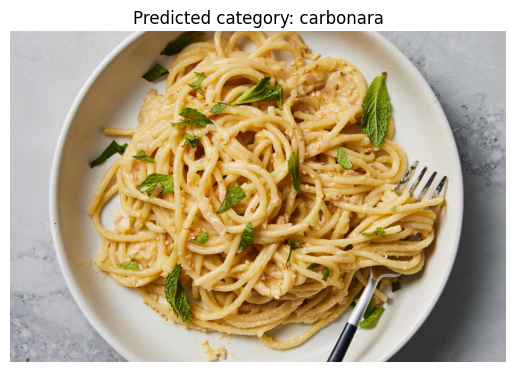

In [29]:
predict(model, preprocess, '/content/pasta.jpg')